<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing , Holt, ExponentialSmoothing

In [3]:
data=pd.read_csv("/content/AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
train = data.iloc[:-int(len(data)*0.2)]
test = data.iloc[-int(len(data)*0.2):]

In [5]:
data['Month']=pd.to_datetime(data['Month'])

In [6]:
def plot_func(forecast1: list[float],
              forecast2: list[float],
              forecast3: list[float],
              title: str) -> None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast1, name='Simple', mode='lines'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast2, name="Holt's Linear", mode='lines'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast3, name="Holt-Winters", mode='lines'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400,
                      xaxis_title='Date', yaxis_title='Passenger Volume')
    return fig.show()

# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Fit Holt-Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(
    train['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12
).fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))

# Plot the forecasts
plot_func(forecasts_simple, forecasts_holt, forecasts_holt_winters, "Holt-Winters Exponential Smoothing")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [8]:
#appending the residual and fitted value to train dataframes
train['fittedvalues'] = model_holt_winters.fittedvalues
train['residuals'] = model_holt_winters.resid
print(train)

       Month  #Passengers  fittedvalues  residuals
0    1949-01          112    111.997011   0.002989
1    1949-02          118    119.397772  -1.397772
2    1949-03          132    132.485694  -0.485694
3    1949-04          129    126.790028   2.209972
4    1949-05          121    118.553190   2.446810
..       ...          ...           ...        ...
111  1958-04          348    370.894734 -22.894734
112  1958-05          363    370.984509  -7.984509
113  1958-06          435    435.713085  -0.713085
114  1958-07          491    479.724073  11.275927
115  1958-08          505    479.483081  25.516919

[116 rows x 4 columns]


<ipython-input-8-863dbb4bd9e7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-863dbb4bd9e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Residual Correlation

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt


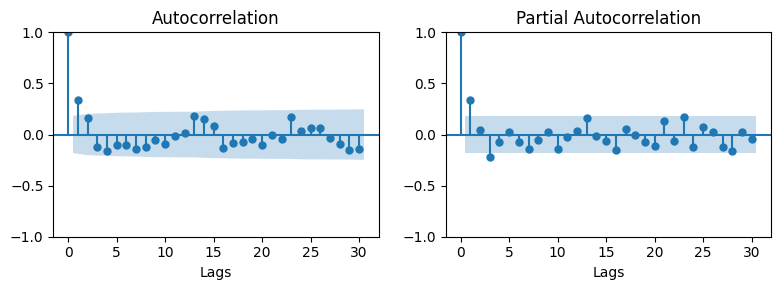

In [11]:
fig,ax = plt.subplots(1,2, figsize=(8,3))
plot_acf(train['residuals'],lags=30, ax=ax[0])
ax[0].set_xlabel('Lags')
plot_pacf(train['residuals'], lags=30, ax=ax[1])
ax[1].set_xlabel('Lags')
plt.tight_layout()
plt.show()

Ljung Box Test

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Carry out Ljung-Box test
print(acorr_ljungbox(train['residuals'], return_df=True))


      lb_stat  lb_pvalue
1   13.917146   0.000191
2   16.931975   0.000211
3   18.861072   0.000292
4   22.061208   0.000195
5   23.398389   0.000283
6   24.627916   0.000400
7   27.059270   0.000325
8   29.031125   0.000313
9   29.344194   0.000567
10  30.414797   0.000733
